In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/videoframedata/new_frame_data.csv')
df.head()

,video_id,frame_path,question,answer,refined_answer,class
0,Bhaila Pyakhan __ Bhairav Dance Thimi __ Bhair...,/kaggle/input/videoframedata/frame_data/frames...,What specific outfits are the people wearing?,The people are wearing traditional Bhutanese c...,The performers are adorned in traditional Newa...,Bhairab Dance
1,Bhaila Pyakhan __ Bhairav Dance Thimi __ Bhair...,/kaggle/input/videoframedata/frame_data/frames...,What specific outfits are the people wearing?,The people are wearing traditional Bhutanese c...,The performers are adorned in traditional Newa...,Bhairab Dance
2,Bhaila Pyakhan __ Bhairav Dance Thimi __ Bhair...,/kaggle/input/videoframedata/frame_data/frames...,What specific outfits are the people wearing?,The people are wearing traditional Bhutanese c...,The performers are adorned in traditional Newa...,Bhairab Dance
3,Bhaila Pyakhan __ Bhairav Dance Thimi __ Bhair...,/kaggle/input/videoframedata/frame_data/frames...,What specific outfits are the people wearing?,The people are wearing traditional Bhutanese c...,The performers are adorned in traditional Newa...,Bhairab Dance
4,Bhaila Pyakhan __ Bhairav Dance Thimi __ Bhair...,/kaggle/input/videoframedata/frame_data/frames...,What specific outfits are the people wearing?,The people are wearing traditional Bhutanese c...,The performers are adorned in traditional Newa...,Bhairab Dance


In [3]:
len(df)

55244

In [4]:
df['class'].value_counts()

class
Kumari           13027
chyabrung        11045
Bhairab Dance    10980
Dhime            10104
Maruni           10088
Name: count, dtype: int64

In [5]:
df['frame_path'][8]

'/kaggle/input/videoframedata/frame_data/frames/Bhaila Pyakhan __ Bhairav Dance Thimi __ Bhairab Naach __ Ashol Gora __--Ashok Gora--UCDdR23hgD-LU3fv8BINF_8A--DdFUPZ4KLCg_cut_clip_2/frame_0.jpg'

In [6]:
!pip install  -q unsloth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 77.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.4/293.4 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 7.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 66.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 24.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.2 MB/s eta 0:00:00


In [7]:
from unsloth import FastVisionModel # FastLanguageModel for LLMs

import torch

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [11]:
model, tokenizer = FastVisionModel.from_pretrained(
    "unsloth/Pixtral-12B-2409-bnb-4bit",
    load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)


==((====))==  Unsloth 2025.1.6: Fast Llava vision patching. Transformers: 4.48.1.
   \\   /|    GPU: Tesla T4. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu121. CUDA: 7.5. CUDA Toolkit: 12.1. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model-00002-of-00002.safetensors:   0%|          | 0.00/4.22G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/133 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/162 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.59k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/177k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

In [12]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True, # False if not finetuning vision layers
    finetune_language_layers   = True, # False if not finetuning language layers
    finetune_attention_modules = True, # False if not finetuning attention layers
    finetune_mlp_modules       = True, # False if not finetuning MLP layers

    r = 16,           # The larger, the higher the accuracy, but might overfit
    lora_alpha = 16,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
    # target_modules = "all-linear", # Optional now! Can specify a list if needed
)

Unsloth: Making `model.base_model.model.vision_tower.transformer` require gradients


In [13]:
import json

# Define the output path for the JSONL file
output_path = "/kaggle/working/dataset.json"

# Convert the dataset to JSONL format
with open(output_path, "w") as f:
    for _, row in df.iterrows():
        json_data = {
            "image_path": row["frame_path"],  # Path to the frame image
            "question": row["question"],     # Question about the frame
            "answer": row["refined_answer"]  # Refined answer
        }
        f.write(json.dumps(json_data) + "\n")

print(f"JSONL file saved to: {output_path}")

JSONL file saved to: /kaggle/working/dataset.json


In [14]:
data = []
with open(output_path, "r") as f:
    for line in f:
        data.append(json.loads(line))

In [15]:
image_path = data[9]["image_path"]
question = data[9]["question"]
answer = data[9]["answer"]

print(f"Image Path: {image_path}")
print(f"Question: {question}")
print(f"Answer: {answer}")

Image Path: /kaggle/input/videoframedata/frame_data/frames/Bhaila Pyakhan __ Bhairav Dance Thimi __ Bhairab Naach __ Ashol Gora __--Ashok Gora--UCDdR23hgD-LU3fv8BINF_8A--DdFUPZ4KLCg_cut_clip_2/frame_1.jpg
Question: Are there any cultural dances depicted?
Answer: Yes, the frames depict the Bhairab Dance, a significant cultural performance by the Newar community honoring Bhairab Bhairava. The dancers' traditional Newari dress, the use of swords, and the large crowd indicate it's a culturally rich event.


In [16]:
import json
from tqdm import tqdm
from PIL import Image

# Instruction for the dataset
instruction = "Answer the question based on the content of this image."

# Function to convert a single sample into a conversation format
def convert_to_conversation(sample):
    try:
        # Load the image using PIL
        image = Image.open(sample["image_path"])
        expected_size = (224, 224)
        # Resize the image
        image = image.resize(expected_size)
        
        conversation = [
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": instruction},
                    {"type": "image", "image": image}, # Pass the resized image
                    {"type": "text", "text": sample["question"]}
                ]
            },
            {
                "role": "assistant",
                "content": [
                    {"type": "text", "text": sample["answer"]}
                ]
            },
        ]
        return {"messages": conversation}
    except Exception as e:
        print(f"Error processing image {sample['image_path']}: {e}")
        return None # Skip the image if there's an error

# Convert dataset with tqdm progress bar
converted_dataset = [convert_to_conversation(sample) for sample in tqdm(data, desc="Processing Samples")]
converted_dataset = [sample for sample in converted_dataset if sample is not None] #remove errored images

Processing Samples: 100%|██████████| 55244/55244 [22:55<00:00, 40.15it/s] 


In [17]:
converted_dataset[21209]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'Answer the question based on the content of this image.'},
    {'type': 'image', 'image': <PIL.Image.Image image mode=RGB size=224x224>},
    {'type': 'text', 'text': 'How does the video affect your emotions?'}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': "The video captures the vibrant energy and joy of the Chyabrung dance, showcasing its deep-rooted connection to Limbu culture. It immerses viewers in a world where dancers' intricate footwork and synchronized movements are choreographed to mimic the natural rhythms of nature, adding an element of awe and wonder. The use of traditional costumes adds another layer of immersion, allowing audiences to feel a profound appreciation for the rich cultural heritage represented. This visual experience creates a strong emotional response, blending pride in one's cultural identity with a sense of communal celebration, making it more than just e

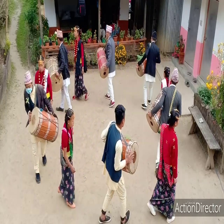

In [18]:
converted_dataset[21209]['messages'][0]['content'][1]['image']

In [19]:
from PIL import Image
from transformers import TextStreamer

# Enable the model for inference
model = FastVisionModel.for_inference(model)

# Load the image as a PIL image
image = converted_dataset[0]['messages'][0]['content'][1]['image']

print(image)

# Prepare instruction and messages
instruction = "Answer the question based on the content of this image."
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image},  # Pass the resized PIL image directly
            {"type": "text", "text": instruction}
        ]
    }
]

input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
print(input_text)

inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")
print(inputs)

# Define the text streamer
text_streamer = TextStreamer(
    tokenizer=tokenizer,
    skip_prompt=True  # Skip showing the input prompt in the output
)
print(text_streamer)

# Generate the output
with torch.no_grad():  # Disable gradient computation during inference
    _ = model.generate(**inputs, streamer=text_streamer, max_new_tokens=128,
                       use_cache=True, temperature=1.5, min_p=0.1)

<PIL.Image.Image image mode=RGB size=224x224 at 0x7D734C7F0D60>
<s>[INST][IMG]Answer the question based on the content of this image.[/INST]
{'input_ids': tensor([[    1,     3,    10,    10,    10,    10,    10,    10,    10,    10,
            10,    10,    10,    10,    10,    10,    12,    10,    10,    10,
            10,    10,    10,    10,    10,    10,    10,    10,    10,    10,
            10,    12,    10,    10,    10,    10,    10,    10,    10,    10,
            10,    10,    10,    10,    10,    10,    12,    10,    10,    10,
            10,    10,    10,    10,    10,    10,    10,    10,    10,    10,
            10,    12,    10,    10,    10,    10,    10,    10,    10,    10,
            10,    10,    10,    10,    10,    10,    12,    10,    10,    10,
            10,    10,    10,    10,    10,    10,    10,    10,    10,    10,
            10,    12,    10,    10,    10,    10,    10,    10,    10,    10,
            10,    10,    10,    10,    10,    10,    1

In [26]:
from unsloth import is_bf16_supported
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

FastVisionModel.for_training(model) # Enable for training!

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer), # Must use!
    train_dataset = converted_dataset,
    args = SFTConfig(
        per_device_train_batch_size = 1,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 30,
        # num_train_epochs = 2, # Set this instead of max_steps for full training runs
        learning_rate = 1e-5,
        fp16 = not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none",     # For Weights and Biases

        # You MUST put the below items for vision finetuning:
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        dataset_num_proc = 4,
        max_seq_length = 2048,
    ),
)

In [27]:
#@title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.741 GB.
9.631 GB of memory reserved.


In [28]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 55,244 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 1 | Gradient Accumulation steps = 4
\        /    Total batch size = 4 | Total steps = 30
 "-____-"     Number of trainable parameters = 66,060,288
🦥 Unsloth needs about 1-3 minutes to load everything - please wait!


Step,Training Loss
1,3.733900
2,3.566400
3,3.566400
4,3.590300
5,3.733400
6,3.132800
7,3.244100
8,3.492700
9,3.402800
10,3.271500


In [29]:
#@title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

429.6875 seconds used for training.
7.16 minutes used for training.
Peak reserved memory = 9.66 GB.
Peak reserved memory for training = 0.029 GB.
Peak reserved memory % of max memory = 65.532 %.
Peak reserved memory for training % of max memory = 0.197 %.


In [33]:
from transformers import TextStreamer

# Enable the model for inference
model = FastVisionModel.for_inference(model)

# Load the image as a PIL image
image = converted_dataset[21000]['messages'][0]['content'][1]['image']

print(image)

# Prepare instruction and messages
instruction = "Which dance is begin performed?"
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image},  # Pass the resized PIL image directly
            {"type": "text", "text": instruction}
        ]
    }
]

input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
print(input_text)

inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")
print(inputs)

# Define the text streamer
text_streamer = TextStreamer(
    tokenizer=tokenizer,
    skip_prompt=True  # Skip showing the input prompt in the output
)
print(text_streamer)

# Generate the output
with torch.no_grad():  # Disable gradient computation during inference
    _ = model.generate(**inputs, streamer=text_streamer, max_new_tokens=128,
                       use_cache=True, temperature=1.5, min_p=0.1)

<PIL.Image.Image image mode=RGB size=224x224 at 0x7D72E7391180>
<s>[INST][IMG]Which dance is begin performed?[/INST]
{'input_ids': tensor([[    1,     3,    10,    10,    10,    10,    10,    10,    10,    10,
            10,    10,    10,    10,    10,    10,    12,    10,    10,    10,
            10,    10,    10,    10,    10,    10,    10,    10,    10,    10,
            10,    12,    10,    10,    10,    10,    10,    10,    10,    10,
            10,    10,    10,    10,    10,    10,    12,    10,    10,    10,
            10,    10,    10,    10,    10,    10,    10,    10,    10,    10,
            10,    12,    10,    10,    10,    10,    10,    10,    10,    10,
            10,    10,    10,    10,    10,    10,    12,    10,    10,    10,
            10,    10,    10,    10,    10,    10,    10,    10,    10,    10,
            10,    12,    10,    10,    10,    10,    10,    10,    10,    10,
            10,    10,    10,    10,    10,    10,    12,    10,    10,    10,


In [ ]:
model.save_pretrained("/kaggle/working/qwen2_Model")
tokenizer.save_pretrained("/kaggle/working/qwen2_Model")